<a href="https://colab.research.google.com/github/banteamlak1888/ML_project_2025/blob/main/Task4_Before_Balancing_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [3]:
import pandas as pd
import numpy as np


In [4]:
from sklearn.exceptions import ConvergenceWarning

from warnings import simplefilter

simplefilter(action='ignore', category=ConvergenceWarning)

In [5]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

In [7]:
df=pd.read_csv('T2_Filled_data_water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [8]:
X=df[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']]
Y=df['Potability']

<font size="6" face="Times New Roman" color="red"><b>Standardization</b></font>

* from sklearn.preprocessing import StandardScaler
* scaler=StandardScaler()
* fit only on training data
* scaler.fit(X_train)
* X_train=scaler.fit_transform(X_train)
* apply same transformation to test data
* X_test=sc_X.transform(X_test)
* result will be from 0 to 1 or from -1 to +1
* X_train

<font size="6" face="Times New Roman" color="red"><b>Normalization</b></font>

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=7)

from sklearn.preprocessing import MinMaxScaler
sc_X=MinMaxScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)
#X_train #result is between 0 and 1


<h1><font size=25, face='Times New Roman'>1. Support Vector Machine</font></h1>

In [10]:
#gamma='auto', kernel='rbf'
svm_classifier=SVC(C=100, random_state=0)
svm_classifier.fit(X_train,y_train)
svm_pred=svm_classifier.predict(X_test)

print('\n****************************************************************\n')
print('Accuracy                     : ',accuracy_score(y_test,svm_pred)*100,'%')
print('Precision / 1-Sensitivity    : ',precision_score(y_test,svm_pred)*100,'%')
print('Recall / Sensitivity         : ',recall_score(y_test,svm_pred)*100,'%')
print('F1 Score                     : ',f1_score(y_test,svm_pred)*100,'%')
print('________________________________________________________________\n')
print('Confusion Matrix\n')
print('',confusion_matrix(y_test,svm_pred))
print('\n****************************************************************')


****************************************************************

Accuracy                     :  61.12804878048781 %
Precision / 1-Sensitivity    :  52.94117647058824 %
Recall / Sensitivity         :  43.656716417910445 %
F1 Score                     :  47.85276073619632 %
________________________________________________________________

Confusion Matrix

 [[284 104]
 [151 117]]

****************************************************************


<font size=20, face='Times New Roman'>K-Fold-SVM</font>

In [11]:
svm_pred=cross_val_predict(svm_classifier,X_test, y_test)

#change the value of cv to see the change
scores_test=cross_val_score(svm_classifier,X_test, y_test, cv=10)
print("Average : ",np.mean(scores_test)*100,'%')

Average :  54.130536130536136 %


#

<h1><font size=25, face='Times New Roman'>2. Decision Tree</font></h1>

In [12]:
#X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=5)
#max_leaf_nodes=8,criterion='entropy', max_depth=10, max_features=9, min_samples_split= 2

dt_classifier=DecisionTreeClassifier(random_state=0)
dt_classifier.fit(X_train,y_train)
dt_pred=dt_classifier.predict(X_test)

print('\n****************************************************************\n')
print('Accuracy                     : ',accuracy_score(y_test,dt_pred)*100,'%')
print('Precision / 1-Sensitivity    : ',precision_score(y_test,dt_pred)*100,'%')
print('Recall / Sensitivity         : ',recall_score(y_test,dt_pred)*100,'%')
print('F1 Score                     : ',f1_score(y_test,dt_pred)*100,'%')
print('________________________________________________________________\n')
print('Confusion Matrix\n')
print('',confusion_matrix(y_test,dt_pred))
print('\n****************************************************************')


****************************************************************

Accuracy                     :  56.40243902439024 %
Precision / 1-Sensitivity    :  46.53846153846154 %
Recall / Sensitivity         :  45.149253731343286 %
F1 Score                     :  45.83333333333333 %
________________________________________________________________

Confusion Matrix

 [[249 139]
 [147 121]]

****************************************************************


<font size=20, face='Times New Roman'>K-Fold-DT</font>

In [13]:

dt_pred=cross_val_predict(dt_classifier,X_test, y_test)
scores_test=cross_val_score(dt_classifier,X_test, y_test, cv=10)
print("Average : ",np.mean(scores_test)*100,'%')

Average :  56.43822843822844 %


#

<h1><font size=25, face='Times New Roman'>3. Sequential Neural Network</font></h1>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.6515 - MAE: 0.4207 - loss: 0.2268  


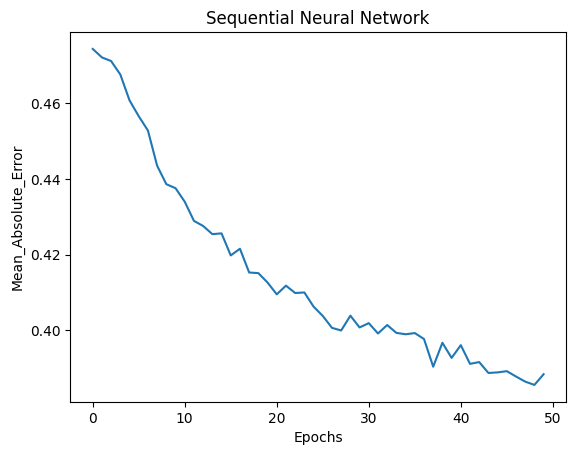

In [14]:
mod_sq=Sequential()
mod_sq.add(Dense(200,input_dim=9,activation='relu'))
mod_sq.add(Dense(200,input_dim=200,activation='relu'))
mod_sq.add(Dense(1,activation='sigmoid'))

mod_sq.compile(loss='mse', optimizer='adam', metrics=['Accuracy','MAE'])
history=mod_sq.fit(X_train, y_train, epochs=50, verbose=0)
mod_sq.evaluate(X_test, y_test)

plt.xlabel('Epochs')
plt.ylabel('Mean_Absolute_Error')
plt.title('Sequential Neural Network')
plt.plot(history.history['MAE'])

In [15]:
predictions=mod_sq.predict(X_test)
sq_pred = (predictions > 0.5)
confusion_matrix(y_test, sq_pred)
print('Precision       : ',precision_score(y_test, sq_pred)*100,'%')
print('Recall          : ',recall_score(y_test, sq_pred)*100,'%')
print('F1 Score        : ',f1_score(y_test, sq_pred)*100,'%')

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Precision       :  68.29268292682927 %
Recall          :  31.343283582089555 %
F1 Score        :  42.96675191815857 %


In [16]:
cm=confusion_matrix(y_test, sq_pred)
print('Cofusion Matrix\n',cm)

Cofusion Matrix
 [[349  39]
 [184  84]]


In [ ]:
#keras.backend.clear_session()

#

<font size=20, face='Times New Roman'>4. MLPC</font>

In [17]:
#NN MLPC
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=7)

mod_nn=MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(5), random_state=0)
mod_nn.fit(X_train, y_train)
nn_pred1=mod_nn.predict(X_test)
print('Accuracy                     : ',accuracy_score(y_test,nn_pred1)*100,'%')
print('Precision / 1-Sensitivity    : ',precision_score(y_test,nn_pred1)*100,'%')
print('Recall / Sensitivity         : ',recall_score(y_test,nn_pred1)*100,'%')
print('F1 Score                     : ',f1_score(y_test,nn_pred1)*100,'%')
print('________________________________________________________________\n')
print('Confusion Matrix\n')
print('',confusion_matrix(y_test,nn_pred1))
print('\n****************************************************************')

Accuracy                     :  46.79878048780488 %
Precision / 1-Sensitivity    :  37.30407523510972 %
Recall / Sensitivity         :  44.40298507462687 %
F1 Score                     :  40.54514480408859 %
________________________________________________________________

Confusion Matrix

 [[188 200]
 [149 119]]

****************************************************************


<font size=20, face='Times New Roman'>K-Fold-MLPC</font>

In [18]:
nn_pred=cross_val_predict(mod_nn,X_test,y_test)
scores_test=cross_val_score(mod_nn,X_test, y_test, cv=10)
print("Average : ",np.mean(scores_test)*100,'%')


Average :  58.99533799533799 %


<h1><font size=25, face='Times New Roman'>3. Naive Bayes</font></h1>

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=7)

nb_classifier=MultinomialNB()
nb_classifier.fit(X_train,y_train)
nb_pred=nb_classifier.predict(X_test)
print('\n****************************************************************\n')
print('Accuracy                     : ',accuracy_score(y_test,nb_pred)*100,'%')
print('Precision / 1-Sensitivity    : ',precision_score(y_test,nb_pred)*100,'%')
print('Recall / Sensitivity         : ',recall_score(y_test,nb_pred)*100,'%')
print('F1 Score                     : ',f1_score(y_test,nb_pred)*100,'%')
print('________________________________________________________________\n')
print('Confusion Matrix\n')
print('',confusion_matrix(y_test,nb_pred))
print('\n****************************************************************')


****************************************************************

Accuracy                     :  53.20121951219512 %
Precision / 1-Sensitivity    :  43.521594684385384 %
Recall / Sensitivity         :  48.88059701492538 %
F1 Score                     :  46.04569420035149 %
________________________________________________________________

Confusion Matrix

 [[218 170]
 [137 131]]

****************************************************************


<font size=20, face='Times New Roman'>K-Fold-NB</font>

In [20]:

nb_pred=cross_val_predict(nb_classifier,X_test, y_test)
scores_test=cross_val_score(nb_classifier,X_test, y_test, cv=10)
print("Average : ",np.mean(scores_test)*100,'%')

Average :  53.993006993007 %
